<a href="https://colab.research.google.com/github/Malcolm777/Trading_algorithms/blob/master/TSLA_MACD_8_25_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program uses the Moving Average Crossover Divergence (MACD) to predict stock price 

In [2]:
#Import the libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
plt.style.use('fivethirtyeight')

In [5]:
#Import the data
from google.colab import files 
uploaded = files.upload()

Saving TSLA_8_25.csv to TSLA_8_25.csv


In [9]:
#Get the data 
df = pd.read_csv('TSLA_8_25.csv')

#Show the index as the date 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-26,2019-08-26,213.600006,215.020004,211.539993,215.000000,215.000000,5051900
2019-08-27,2019-08-27,215.740005,218.800003,212.029999,214.080002,214.080002,5416200
2019-08-28,2019-08-28,213.690002,217.250000,212.309998,215.589996,215.589996,3225500
2019-08-29,2019-08-29,219.000000,223.399994,218.000000,221.710007,221.710007,5179500
2019-08-30,2019-08-30,229.149994,232.440002,224.210007,225.610001,225.610001,9320600
...,...,...,...,...,...,...,...
2020-08-19,2020-08-19,1865.000000,1911.000000,1841.209961,1878.530029,1878.530029,12205300
2020-08-20,2020-08-20,1860.680054,2021.989990,1857.060059,2001.829956,2001.829956,20611800
2020-08-21,2020-08-21,2044.760010,2095.489990,2025.050049,2049.979980,2049.979980,21489600
2020-08-24,2020-08-24,2126.280029,2129.000000,1927.520020,2014.199951,2014.199951,20063600


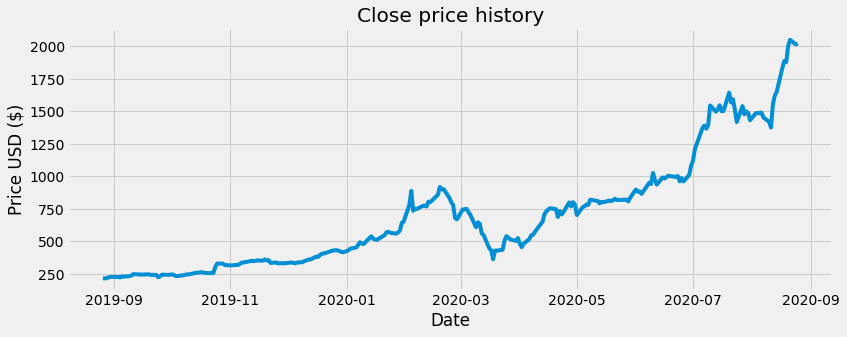

In [10]:
#Visually show the stock price 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close price history')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [11]:
#Calculate the MACD and the single line indicators 

#Calculate the shortEMA 
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the longEMA 
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD 
MACD = shortEMA - longEMA 

#Calculate the Signal 
Signal = MACD.ewm(span=9, adjust=False).mean()


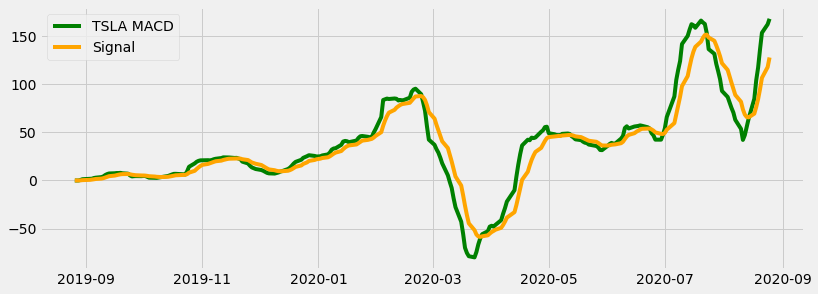

In [12]:
#Plot the chart 
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'TSLA MACD', color = 'green', alpha=1) 
plt.plot(df.index, Signal, label = 'Signal', color = 'orange', alpha=1)
plt.legend(loc = 'upper left')
plt.show()

In [13]:
#Create the new columns for the data 
df['MACD'] = MACD 
df['Signal line'] = Signal

In [14]:
#Create a function to signal when to buy and sell an asset 
def buy_sell(signal): 
  Buy = []
  Sell = []
  flag = -1 

  for i in range(0, len(signal)): 
    if signal['MACD'][i] > signal['Signal line'][i]: 
      Sell.append(np.nan)
      if flag != 1: 
        Buy.append(signal['Close'][i])
        flag = 1
      else: 
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal line'][i]: 
      Buy.append(np.nan)
      if flag != 0: 
        Sell.append(signal['Close'][i])
        flag = 0
      else: 
        Sell.append(np.nan)
    else: 
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)
  
      

In [15]:
#Create a buy and sell column 
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0] 
df['Sell_Signal_Price'] = a[1]

In [16]:
#Show the data 
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,Buy_Signal_Price,Sell_Signal_Price
2019-08-26,2019-08-26,213.600006,215.020004,211.539993,215.000000,215.000000,5051900,0.000000,0.000000,NaN,NaN
2019-08-27,2019-08-27,215.740005,218.800003,212.029999,214.080002,214.080002,5416200,-0.073390,-0.014678,NaN,214.080002
2019-08-28,2019-08-28,213.690002,217.250000,212.309998,215.589996,215.589996,3225500,-0.009598,-0.013662,215.589996,NaN
2019-08-29,2019-08-29,219.000000,223.399994,218.000000,221.710007,221.710007,5179500,0.528697,0.094810,NaN,NaN
2019-08-30,2019-08-30,229.149994,232.440002,224.210007,225.610001,225.610001,9320600,1.255524,0.326953,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-19,2020-08-19,1865.000000,1911.000000,1841.209961,1878.530029,1878.530029,12205300,117.361343,84.530065,NaN,NaN
2020-08-20,2020-08-20,1860.680054,2021.989990,1857.060059,2001.829956,2001.829956,20611800,136.259281,94.875908,NaN,NaN
2020-08-21,2020-08-21,2044.760010,2095.489990,2025.050049,2049.979980,2049.979980,21489600,153.353573,106.571441,NaN,NaN
2020-08-24,2020-08-24,2126.280029,2129.000000,1927.520020,2014.199951,2014.199951,20063600,162.144670,117.686087,NaN,NaN


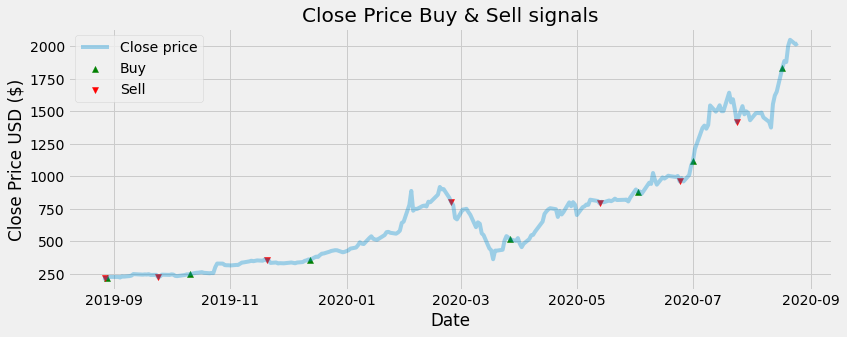

In [17]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy', marker='^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell', marker='v', alpha = 1)
plt.plot(df['Close'], label='Close price', alpha = 0.35) 
plt.title('Close Price Buy & Sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()
